In [1]:
import zipfile
import helpers as hp

In [2]:
[training, test] = hp.import_dasaset()
training

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
only_number = training.select_dtypes(include='number')

In [4]:
removed_missing = hp.remove_missing(only_number)

Rows without missing values: %n 2078080
Rows with missing values: %n 2071880


In [7]:
from matplotlib import pyplot as plt
sse = hp.calculate_kmeans_sum_square_errors(removed_missing)

c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tjvan\OneDrive\huiswerk_ou\thesis\notebook\Differential privacy\helpers.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["clusters"] = kmeans.labels_
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tjvan\OneDrive\huiswerk_ou\thesis\notebook\Differential privacy\helpers.py:20: SettingWithCopyWarning: 
A value is trying to be set o

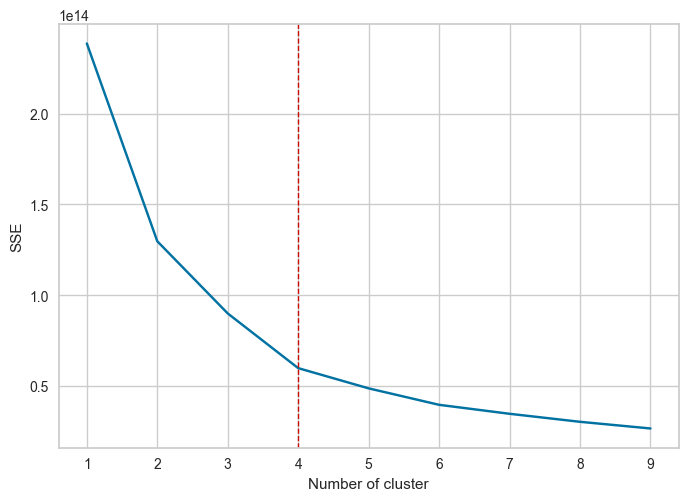

In [14]:
fig, ax = plt.subplots()
ax.plot(list(sse.keys()), list(sse.values()))
ax.axvline(x=4, color='r', label='Average', linestyle='--', linewidth=1)

ax.set_xlabel("Number of cluster")
ax.set_ylabel("SSE")
plt.show()

Text(0.5, 1.0, 'Test')

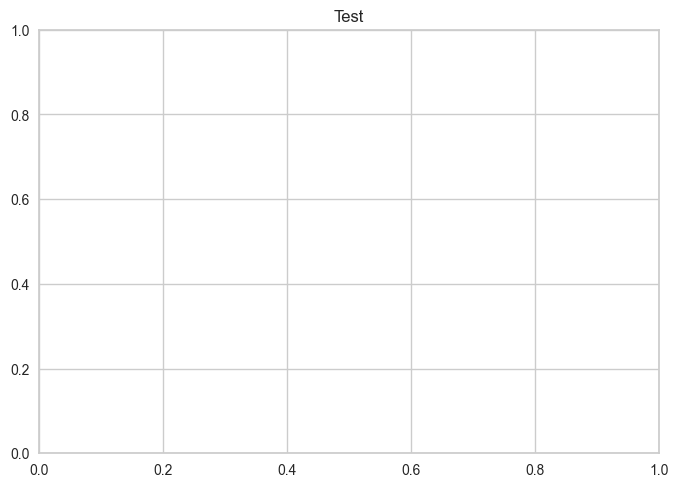

In [6]:
from matplotlib import pyplot as plt
from yellowbrick.regressor import PredictionError


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Test')
